# Project 1: Algorithmic trading 

Algorithmic trading is the use of computer programs to automate stock trading decisions, based on available data such as share price or trading volume over different periods of time.

## Task 1: Code review and debugging 

Your junior colleague has started to work on the project. They started with writing the code to generate the simulated stock market data, for a number of stocks. Here is the brief for this part of the project:

> Generate simulated stock prices over a period of time, for a given number of companies, given share price at initial date, and volatility. Return data in a NumPy array, each column representing the price history for 1 company, and each row representing the share prices for all the stocks at a given date.
>
> The time increment is **1 day**, and share prices are given as the **closing price** each day.
>
> We assume that the [random walk hypothesis](https://en.wikipedia.org/wiki/Random_walk_hypothesis) holds. This means that the share price $p_t$ on a given day ($t>0$) and for a given company is normally given by
>
> $$
p_{t} = p_{t-1} + \Delta p_t,
$$
>
> where $\Delta p_t \sim N(0, \sigma^2)$ is the share price increment each day, normally distributed with mean $0$ and standard deviation $\sigma$. We take $\sigma$ to represent the inherent **volatility** of the stock.
>
> Whenever a share price dips to zero, we consider the company closed, and the daily share prices starting on that day until the end of the simulation should be set to `NaN`.
>
> We also model randomly occurring **important news** (e.g. political turmoil, a natural disaster, a new product announcement...), which have a positive or negative impact on share price over a number of days. This impact is modelled as a temporary **drift** $d$ in share price increments, positive or negative, with more or less magnitude depending on the volatility of the stock price.
> - Every day, there is a 1% chance of such an event happening, and immediately starting to impact the price of a given stock.
> - To represent that the news might impact an inherently more volatile stock more significantly than a less volatile stock, the drift $d$ is proportional to $\sigma$.
> - To represent that high-impact events happen more rarely, we choose $d = m \sigma$, with $m \sim N(0, 2^2)$ -- that is, the drift is equal to $m$ standard deviations of the usual increment. This means that the event is equally likely to be positive or negative, but that, for example, the magnitude of the drift is only about 5% likely to be greater than $4\sigma$.
> - When an event occurs, its impact lasts for anywhere between 3 days and 2 weeks -- i.e. the total duration is $t_{\text{event}} \sim U\{3, 14\}$.
> - The impact of several events occurring over the same time span is cumulative.
> 
> To summarise, the share price $p_t$ on a given day ($t>0$) and for a given company is given by
>
> $$
p_t = p_{t-1} + \Delta p_t + \sum_i d_i,
$$
>
> where each $d_i$ is the drift caused by an "active" event.
>
> For example: if the current day is $t = 15$, and
> - at $t = 10$, a negative event occurred, causing a drift $d_1$ lasting $6$ days,
> - at $t = 12$, another negative event occurred, causing a drift $d_2$ lasting $12$ days,
> - at $t = 15$ (today), a positive event occurs, causing a drift $d_3$ lasting $3$ days,
>
> then the share price today is given by
>
> $$ p_{15} = p_{14} + \Delta p_{15} + d_1 + d_2 + d_3. $$
>
> And tomorrow, if no event occurs, the first negative event will cease to have an impact:
>
> $$ p_{16} = p_{15} + \Delta p_{16} + d_2 + d_3. $$


Your colleague started working on the task, but they are now on parental leave, and they won't be back at work for a few months. You are tasked with continuing the project -- but first, as is good practice in the company, you should provide a **code review** for them, which they can read and learn from upon their return.

They didn't have time to properly test the code before leaving, and since you will continue working on the project, you also need to **test and debug** this code before going any further.

The definition of the function `generate_stock_price()` written by your colleague is in the `data.py` module, and here they call the function to generate the data. Your review should cover **all of the code** -- both the function definition and the use here.

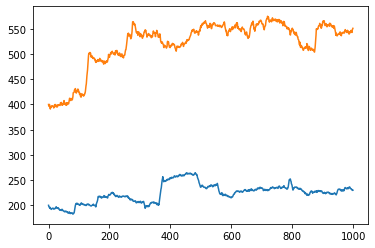

In [2]:
#Clariification: the reviewed code with corrected function calling is in the code chunk below this one, I kept this as it
#was in order to see before after version, obiviously the calling of the function did not change and 
#this works because data.py has now the correct code :) 
import matplotlib.pyplot as plt
import trading.data as data 
import numpy as np 

# Make some data
N = 2
p0 = [200, 400]
v = [1, 2.5]
stock_prices = np.zeros([1000, N])
for i in range(N):
    stock_prices[:, i] = data.generate_stock_price(1000, p0[i], v[i])
plt.plot(stock_prices)
plt.show()

In [3]:
#In order to verify if our code is correct, it is also important to see what we are generating make sense or not 
# we convert it into a data frame to be able to see that 
import pandas as pd 
df_stock_prices = pd.DataFrame(stock_prices)
df_stock_prices 

,0,1
0,200.000000,400.000000
1,197.655263,396.537627
2,196.470457,398.385669
3,195.183734,399.983839
4,194.551847,397.339498
...,...,...
995,231.564340,544.646496
996,230.523054,542.816234
997,229.640086,547.842352
998,230.923371,549.480604


---
## Task 2: Trading strategies

 The goal is to:

1. Design a **trading strategy** -- an algorithm which will make buying or selling decisions based on certain rules, given the price data up to the current date.
2. **Deploy it** over 5 years of simulation data. We will need to write code to actually execute the buying and selling, and log the transactions.
3. Evaluate its **performance** over 5 years (in terms of profit made), and how it depends on different factors.

For all functions which have a precise specification, the **docstring** will already be written for each function you need to write, which will describe what the function needs to do, what input arguments it takes, and what output values it returns. When the assignment is released, all function definitions will only have the `pass` command -- which is just telling Python to do nothing. Remove the `pass` command and replace it with your code to define each function.

[As always, start by consulting the documentation if anything is unclear](https://docs.python.org/3/tutorial/controlflow.html#defining-functions).

The file `stock_data_5y.txt` contains data generated using the procedure from Task 1, for 20 different stocks over 5 years. The first row indicates the value used for volatility when the data was generated.


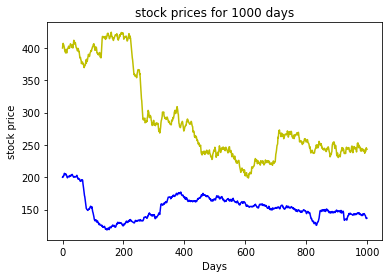

In [6]:
# Write your revised and debugged version of the code here.
import numpy as np 
import matplotlib.pyplot as plt
import trading.data as data
N = 2
p0 = [200, 400]
v = [1, 2.5]
stock_prices = np.zeros([1000, N])
for i in range(N):
    stock_prices[:, i] = data.generate_stock_price(1000, p0[i], v[i])

#Make a prominent looking plot: 

fig, ax = plt.subplots()
ax.plot(stock_prices[:,0], 'b-')
ax.plot(stock_prices[:,1], 'y-')
plt.title('stock prices for 1000 days')
plt.xlabel('Days')
plt.ylabel('stock price')
plt.legend
plt.show()


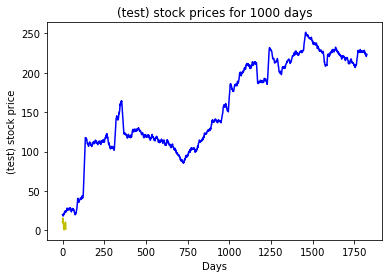

[[150.         250.        ]
 [148.01201828 252.38088825]
 [147.95847167 259.05501888]
 ...
 [100.90350955 216.46927083]
 [103.50104543 218.79260352]
 [100.16115377 219.37465113]]
please specify the volatility for each stock
None
please specify the initial price for each stock
None


In [7]:
# task 2.0 (change this later)
import numpy as np 
import matplotlib.pyplot as plt
import trading.data as data
from importlib import reload
reload(data)
# create a function get_data(inspired from doc_string in correction.md
N = 2 
test_prices = np.zeros([1000,N])
initial_price = [20, 10]
volatility =[1,2.5]
test_prices = data.get_data('generate', initial_price, volatility)
#to make the plot look more prominent: 

fig, ax = plt.subplots()
ax.plot(test_prices[:,0], 'b-')
ax.plot(test_prices[:,1], 'y-')
plt.title('(test) stock prices for 1000 days')# as notice our stock price matrix is 1000 x 2
plt.xlabel('Days')
plt.ylabel('(test) stock price')
plt.legend
plt.show()

#test when initial price and volatiltity is given
print(data.get_data(method = 'generate', initial_price = [150,250], volatility=[1.8, 3.2]))
#test when volatility is not given 
print(data.get_data(method ='generate', initial_price = [150,250]))
#test when initial price is not given 
print(data.get_data(method ='generate', volatility = [3]))


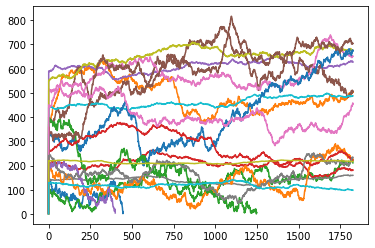

Found data with initial prices [210.0, 100.0] and volatilities [1.2, 3.4] 
[[  1.2    3.4 ]
 [210.   100.  ]
 [206.8   96.64]
 ...
 [181.56 222.23]
 [179.42 214.96]
 [181.03 210.96]]
Found data with initial price[380.0] and volatility [5.2]
[[  5.2]
 [380. ]
 [382.9]
 ...
 [  nan]
 [  nan]
 [  nan]]
Found data with initial prices [210.0, 100.0] and volatilities [1.2, 3.4]
Input argument volatility is ignored
[[  1.2    3.4 ]
 [210.   100.  ]
 [206.8   96.64]
 ...
 [181.56 222.23]
 [179.42 214.96]
 [181.03 210.96]]
[[5.4000e+00 3.0000e+00 3.4000e+00 ... 2.4000e+00 2.0000e-01 6.0000e-01]
 [1.5000e+02 3.7000e+02 1.0000e+02 ... 2.4000e+02 2.2000e+02 1.3000e+02]
 [1.4244e+02 3.6595e+02 9.6640e+01 ... 2.4072e+02 2.1989e+02 1.2939e+02]
 ...
 [       nan 5.0066e+02 2.2223e+02 ... 2.3364e+02 2.1706e+02 9.8940e+01]
 [       nan 5.0489e+02 2.1496e+02 ... 2.3525e+02 2.1709e+02 9.8850e+01]
 [       nan 5.0257e+02 2.1096e+02 ... 2.3187e+02 2.1711e+02 9.8390e+01]]


In [8]:
#create plot from task 2.0, by reading stock_prices_5y.txt 
import numpy as np 
import matplotlib.pyplot as plt
import trading.data as data
from importlib import reload
reload(data)

#test when nothing is specified 
plt.plot(data.get_data(method = 'read'))
plt.show()
# test when initial price is given 
#print(data.get_data(method ='read',initial_price[210,58]))
#test when we have only initial price 
print(data.get_data(method = 'read', initial_price = [210,58]))
#test when we only have volatlity 
print(data.get_data(method ='read', volatility = [5.1]))
#test when we have both intitial price and volatility specified 
print(data.get_data(method = 'read', initial_price = [210,58], volatility = [5.2]))
#test when nothing is specified 
print(data.get_data())




---

### 2.1. Transaction processing

Let's start by writing functions which will actually do the work of buying and selling stock, updating our portfolio, and logging transactions in a ledger.

Write functions in the `process.py` module for this part.

#### Log transactions in a ledger

🚩 Every time we perform a transaction, we need to add a record of it to the ledger file. Write a function `log_transaction()` to log a transaction in a file `ledger.txt`.

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import trading.process as process
from importlib import reload
reload(process)
process.log_transaction('buy', 5, 2, 10, 100, 50, 'ledger.txt')
    
    

#### Buying and selling

To keep track of how many shares we currently own for each stock, we will use a list `portfolio` of length `N` (where `N` is the number of different stocks available in the simulation), where each element is an integer indicating the number of shares we own for that stock.

For example, if there are 5 different stocks available, and we own 4 shares of stock `0` and 2 shares of stock `3`, then the list `portfolio` should be `[4, 0, 0, 2, 0]`.

Let's start with some simplifying assumptions:
- We will only hold a [*long position*](https://www.investopedia.com/ask/answers/100314/whats-difference-between-long-and-short-position-market.asp) -- this means that we will only be able to sell shares that we have already bought.
- Whenever we decide that it's a good time to sell shares for a given stock (based on our strategy), we'll sell *all* our shares at once.
- We have infinite money to spend (wouldn't that be nice? 😊)

🚩 Write a function `buy()` to purchase shares from a given company, using an allocated amount of money, and a function `sell()` to sell all the shares you own for a given stock. Both these functions should read and update the list `portfolio` **in-place** when you make a purchase or sell stock, as well as call `log_transaction()` to record the transaction in the ledger.

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import trading.process as process
from importlib import reload
import trading.data as data
reload(process)
sim_data = data.get_data()
portfolio = np.zeros(20)
process.buy(21, 7, 1000, sim_data, 30, portfolio,'ledger.txt')
process.sell(8, 1, sim_data, 20, portfolio,'ledger.txt')

#### Create a portfolio

🚩 Write a function `create_portfolio()` which creates a portfolio with size `N`, calling the function `buy()` to purchase some shares on different stocks on the first day of the simulation.

The way we decide how many shares to buy of each stock on day 0 will be a part of our strategy later on.

#### Pause for testing

Before moving any further, it's time to do some testing to make sure all these parts are working together well.

🚩 In the code cell below, import your `data` and `process` modules.
- Use your function `get_data()` to read the 5 columns of `stock_data_5y.txt` with initial prices closest to 100, 120, 400, 250, and 300.
- Use your function `create_portfolio()` to create a test portfolio by buying shares for these 5 stocks, allocating 5000 to each stock, with fees of 20 per transaction.

You should obtain the following portfolio:
```
[49, 38, 12, 19, 15]
```
and you should see this data in `ledger.txt`:
```
buy,0,0,49,100.00,-4920.00
buy,0,1,38,130.00,-4960.00
buy,0,2,12,400.00,-4820.00
buy,0,3,19,260.00,-4960.00
buy,0,4,15,330.00,-4970.00
```

You should also check that this works when you generate data from scratch instead of reading it from the file.

In [11]:
# testing create_portfolio 
import numpy as np 
import matplotlib.pyplot as plt
import trading.process as process
from importlib import reload
import trading.data as data
reload(process)
sim_data = data.get_data(method = 'read', initial_price =[100,120,400,250,300])
print(sim_data[1])
N = sim_data.shape[1] # 1 is the number of columns 
portfolio = process.create_portfolio([5000]*N, sim_data, 20, 'ledger.txt')
print(process.create_portfolio([5000]*N, sim_data, 20, 'ledger.txt'))
sim_data[1]

Found data with initial prices [100.0, 130.0, 400.0, 260.0, 330.0] and volatilities [3.4, 0.6, 4.6, 1.6, 4.2] 
[100. 130. 400. 260. 330.]
[1464, 8300, 1082, 3112, 1185]


array([100., 130., 400., 260., 330.])

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import trading.process as process
from importlib import reload
import trading.data as data
reload(process)
sim_data = data.get_data(initial_price =[100,120,400,250,300])[1:]
N = sim_data.shape[1] # 1 is the number of columns 
portfolio = process.create_portfolio([5000]*N, sim_data, 20, 'ledger.txt')
portfolio

Found data with initial prices [100.0, 130.0, 400.0, 260.0, 330.0] and volatilities [3.4, 0.6, 4.6, 1.6, 4.2] 


[49, 38, 12, 19, 15]

### 2.2. Indicators

To implement a trading strategy, we will need to compute some **indicators** from the data over time, up to a given date. These indicators will help us make decisions about what to buy and sell, and when.

Remember that at any date you compute these indicators, you should only use **past** data.

Your functions for this part should go in the `indicators.py` module.

#### Moving averages

A moving average is simply an average (sometimes weighted) of the share price, calculated over a number of days. For example, the 7-day moving average at a given date is the average price over the 7 days leading up to the date. The moving average essentially smoothes out the high-frequency noise in the daily price data, allowing to see the more long-term variations.

🚩 Write a function `moving_average()` which calculates the $n$-day moving average for a stock over time. Your function should also be able to calculate weighted moving averages, if given a vector of weights.

Found data with initial prices [210.0] and volatilities [1.2] 


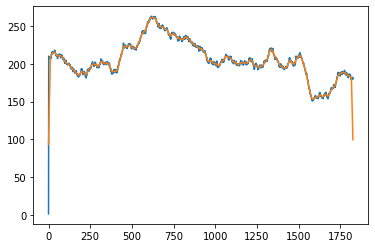

(1826,)

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import trading.indicators as indicators
from importlib import reload
import trading.data as data
reload(indicators)
#create a sample stock and test 
sampleStock = data.get_data(initial_price =[210])[:,0]
sma = indicators.moving_average(sampleStock, n = 20)
plt.plot(sampleStock)
plt.plot(sma)
plt.show()
sampleStock.shape

#### Oscillators

An oscillator is a signal which generally indicates how well the price is doing today, relatively to how well it has been doing overall for the past $n$ days. Oscillators are a relative measure, given as a percentage. Two widely-used oscillators are the **stochastic oscillator** and the **relative strength index (RSI)**. When they reach certain thresholds, they can be used to make buying or selling decisions.

To calculate the level of the stochastic oscillator on a given day:

1. Find the highest and lowest prices over the past $n$ days.
2. Compute the difference between today's price and the lowest price, call it $\Delta$.
3. Compute the difference between the highest price and the lowest price, call it $\Delta_{\text{max}}$.
4. The level of the oscillator on this day is the ratio $\frac{\Delta}{\Delta_{\text{max}}}$.

To calculate the level of the RSI on a given day:

1. Calculate all the price differences on **consecutive days** over the past $n$ days.
2. Separate the positive differences (i.e. the price increased from one day to the next) from the negative differences (the price decreased from one day to the next).
3. Calculate the average of all the positive differences, and the absolute value of the average of all the negative differences.
4. Calculate the ratio between these 2 averages (positive/negative). Call this $RS$ (the relative strength).
5. The RSI on this day is given by $1 - \frac{1}{1+RS}$.

🚩 Write a function `oscillator()` which can calculate either the stochastic oscillator or the RSI over time (as indicated by the user), using a period of $n$ days.

---

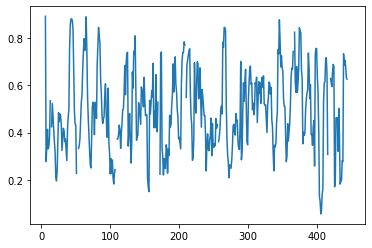

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
import trading.indicators as indicators
from importlib import reload
import trading.data as data
reload(indicators)
sim_data = data.get_data()
#test oscillator
#plt.plot(indicators.oscillator(sim_data[:,0], n=7,osc_type ='stochastic')) 

plt.plot(indicators.oscillator(sim_data[:,0], n =7, osc_type = 'RSI'))
plt.show()

### 2.3. Trading strategy

Now that we have all our tools ready to trade, it's time to deploy some trading strategies!

All your functions for this part should go in the `strategy.py` module. Note that since you will use functions from your `process.py` module, you should import it at the start of `strategy.py`. Since it's in the same folder, you don't need the `trading.` prefix there:
```python
import process as proc
```

There is a bit more freedom for you here in how you implement these functions, so we will only provide the docstring for `random()`, to give you an idea of what essential input data you'll need.

With every strategy:
- we start a new ledger file,
- we start with creating a portfolio on day 0 and invest some amount **equally** between all available stocks,
- we invest this same amount any time we buy shares,
- we finish with selling all remaining stock on the last day.

#### The "feeling lucky" strategy

The first "strategy" we'll try is the **random strategy**: we're going to decide randomly whether to buy or sell shares for each stock, and do this at regular time intervals.

🚩 Write a function `random()` which periodically, for each stock, decides whether to buy more shares, do nothing, or sell all your shares.

In [17]:
#strategy 1 for the 2.4 part. The results from this tell us the strategy that might be employed when we spread decision to 
# 1826 days.. we notice that initially the strategy is to buy and then their are cases of selling and then buying. But, the 
#major strategy is to buy 
import numpy as np 
import matplotlib.pyplot as plt
import trading.strategy as strategy 
from importlib import reload
import trading.data as data
reload(strategy)
stock_price = data.get_data()
strategy.random(stock_price)

#### Crossing averages

This strategy involves computing 2 different moving averages over time, one "slow" and one "fast". Periods of 50 days and 200 days are often used, for instance. Since the fast moving average (FMA) will change more quickly than the slow moving average (SMA) when the share price changes, one could interpret the following:

- When the FMA crosses the SMA from below, then the share price is starting to rise significantly, and it's a good time to buy shares.
- When the FMA crosses the SMA from above, then the share price is starting to lower significantly, and it's a good time to sell shares before the price gets too low.

🚩 Write a function `crossing_averages()` which finds the crossing points between a SMA with period $n$ and a FMA with period $m$ to make buying or selling decisions.

(1825,)


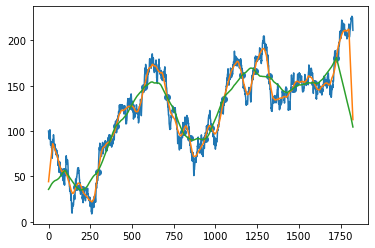

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import trading.indicators as indicators
import trading.strategy as strategy 
from importlib import reload
import trading.data as data
reload(indicators)
reload(strategy)
stock_number = 2
stock_price = data.get_data()[1:,stock_number]
# fma = strategy.crossing_averages(stock_price[1:])
# sma = strategy.crossing_averages(stock_price[1:])
fma = np.array(indicators.moving_average(stock_price, 50))
sma = np.array(indicators.moving_average(stock_price, 200))
d = strategy.crossing_averages(stock_price)
# fma.shape
plt.plot(stock_price)
plt.plot(fma)
plt.plot(sma)
plt.scatter(d[0], [fma[x] for x in d[0]])
plt.show()

#### Momentum trading using oscillators

Oscillators can help us guess if the price of a share is currently overvalued (*overbought*) or undervalued (*oversold*). Generally:
- the price is considered overvalued when the oscillator is above a threshold of 0.7 to 0.8 (good time to sell).
- the price is considered undervalued when the oscillator is below a threshold of 0.2 to 0.3 (good time to buy).

🚩 Write a function `momentum()` which uses a given oscillator (stochastic or RSI) with period $n$ to make buying or selling decisions, depending on a low threshold and a high threshold.

You should implement a minimum cool-down period after buying or selling, before making another transaction -- otherwise, if the oscillator crosses a threshold and stays beyond it for some time, you could end up buying shares every day for a while!

Alternatively, you could also wait until the oscillator has remained beyond a threshold for a few days before deciding to buy or sell.

#### Time for testing!

🚩 Test your functions in the code cell below, using data for one stock and a fairly short period of time (instead of 5 years). Run each of your functions on the data, plot relevant indicators, and check the ledger to see whether your strategies have performed the required transactions correctly.

---
### 2.4. Evaluation

Now that we've checked that our strategies worked, we can deploy them on lots of data and see how they do. Any functions you write for this part should go in `performance.py`.

#### Getting data from the ledger

The ledger created for each strategy will contain the key information as to how well it has performed.

🚩 Write a function `read_ledger()` which reads out data from a ledger file. Your function should report relevant overall information and display it on the screen in a readable manner, to get a quick glance at how much trading has been performed during the simulation by a given strategy. For example, you could report:
- the total number of transactions performed
- the total amount spent and earned over 5 years
- the overall profit or loss over 5 years
- the state of your portfolio just before the last day
- etc...

Your function should also produce a plot of the amount of money you had over time, starting from zero before buying the first shares. If you made a profit overall, then this graph should be above zero on the last day; if you made a loss, it will be below zero.

#### Run some simulations

🚩 In the code cell below (you can create more if you wish), run simulations using your different strategies.
- Use `get_data()` to read or simulate some data for 1 or more stock(s).
- Then, call 1 or more of your strategies to perform the simulation on the data.
- Finally, use `read_ledger()` to report results after each simulation.

Here are some of the ways you could evaluate your strategies -- you should try at least a couple of these. If you have other ideas for investigation, feel free to explore them too. You should plot and display any relevant data which helps the reader understand your findings.
- Produce a large, clearly labelled plot, showing the share price of one stock over time, the 2 moving averages used with `crossing_averages()` on the same graph, and the 2 different oscillators used with `momentum()` on a smaller graph below, with the time axes aligned. Find a way to indicate on the plots where the purchases and sales were made by each strategy.
- Find (or generate) data which seems to have a relatively strong upwards or downwards trend, and test your strategies on this data.
- Generate data for at least 20 stocks, all with the same initial price and volatility. This will allow you to more reliably evaluate the performance of a given strategy, by essentially repeating the experiment with the same parameters. How often does each strategy "win" (i.e. beat the other strategies in terms of final profit)? Can you find a measure of the reliability of each strategy?
- When operating on the same data, do the strategies (apart from `random()`) generally make purchases and sales at similar times? Can you explain why/why not?
- Experiment with different volatilities -- do certain strategies seem to perform better or worse for more volatile stocks?
- Experiment with different periods for the moving averages and the oscillators, and different decision thresholds or cool-down periods.

In [33]:
import trading.performance as perf 
from importlib import reload
reload(perf)

T = perf.read_ledger(ledger_file='ledger_random.txt')
T

{'total_spent': -7775188.609999996,
 'total_earned': 32829207.820000015,
 'total_amount': 25054019.210000016}

In [34]:
T['total_earned'] + T['total_spent']

25054019.21000002

(1825,)


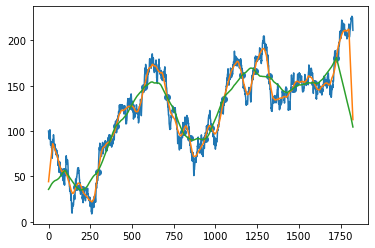

In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import trading.indicators as indicators
import trading.strategy as strategy 
from importlib import reload
import trading.data as data
reload(indicators)
reload(strategy)
stock_number = 2
stock_price = data.get_data()[1:,stock_number]
# fma = strategy.crossing_averages(stock_price[1:])
# sma = strategy.crossing_averages(stock_price[1:])
fma = np.array(indicators.moving_average(stock_price, 50))
sma = np.array(indicators.moving_average(stock_price, 200))
d = strategy.crossing_averages(stock_price)
# fma.shape
plt.plot(stock_price)
plt.plot(fma)
plt.plot(sma)
plt.scatter(d[0], [fma[x] for x in d[0]])
plt.show()
#simulation 2
#purchases were made when the fma crosses the sma from above
#sold when the fma crosses the sma from below
##simulation 1 for the 2.4 part. The results from this tell us the strategy that might be employed when we spread decision to 
# 1826 days.. we notice that initially the strategy is to buy and then their are cases of selling and then buying. But, the 
#major strategy is to buy 